# Korki drogowe

## Wstęp 

Równanie opisujące długość korka ma postać
$$ L' = \left( v_{śr} + rL' \right) \cdot n(t) - p(t). $$
Po przekształceniu otrzymujemy
$$ L' = \frac{v_{śr}\cdot n(t) - p(t)}{1 - r\cdot n(t)}. $$

In [5]:
using Plots
using LsqFit

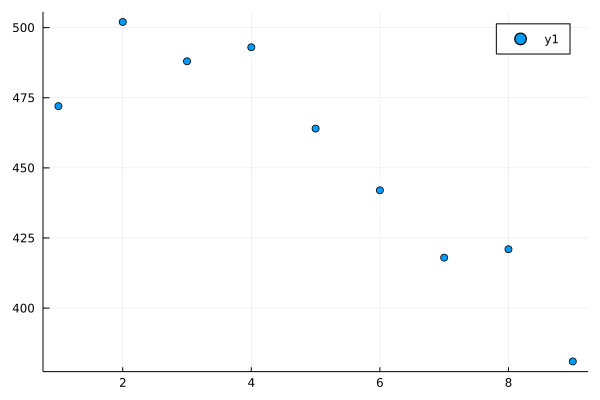

In [3]:
data = [472, 502, 488, 493, 464, 442, 418, 421, 381]
scatter(1:9, data)

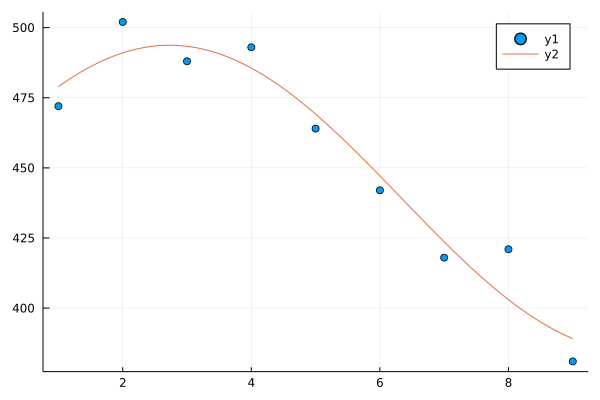

In [11]:
mod(x,p) = p[1] .* sin.(p[2] .* x .+ p[3]) .+ p[4]
fit = curve_fit(mod, 1:9, data, [50., 0.3, 1., 450.])

scatter(1:9, data)
xs = 1:0.01:9
plot!(xs, mod(xs, fit.param))